<a href="https://colab.research.google.com/github/psilvaf/ictp-2021-lss-surveys/blob/main/Exercise_4_Healpix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4: Healpix 
(thanks again to Joe Zuntz for code base)

##We'll now use the library `healpy` to explore some Healpix maps of the CMB sky made from Planck Space Telescope data.

## Importing `healpy` to `Colaboratory`

In [ ]:
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.5.4-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

PREFIX=/usr/local
installing: python-3.6.5-hc3d631a_2 ...
installing: ca-certificates-2018.03.07-0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-hdf63c60_3 ...
installing: libstdcxx-ng-7.2.0-hdf63c60_3 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: ncurses-6.1-hf484d3e_0 ...
installing: openssl-1.0.2o-h20670df_0 ...
installing: tk-8.6.7-hc745277_3 ...
installing: xz-5.2.4-h14c3975_4 ...
installing: yaml-0.1.7-had09818_2 ...
installing: zlib-1.2.11-ha838bed_2 ...
installing: libedit-3.1.20170329-h6b74fdf_2 ...
installing: readline-7.0-ha6073c6_4 ...
installing: sqlite-3.23.1-he433501_0 ...
installing: asn1crypto-0.24.0-py36_0 ...
installing: certifi-2018.4.16-py36_0 ...
installing: chardet-3.0.4-py36h0f667ec_1 ...
installing: idna-2.6-py36h82fb2a8_1 ...
installing: pycosat-0.6.3-py36h0a5515d_0 ...
installing: pycparser-2.18-py36hf9f622e_1 ...
installing: pysocks-1.6.8-py36_0 ...
installing: ruamel_yaml-0.15.37-py36h14c3975_2 ...
installing: six-1.11

--2021-01-29 18:52:33--  https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh [following]
--2021-01-29 18:52:33--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58468498 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.4-Linux-x86_64.sh.1’

     0K .......... .......... .......... .......... ..........  0% 49.0M 1s
    50K .......... .......... .......... .......... ..........  

In [ ]:
%%bash
conda install --channel defaults conda python=3.6 --yes
conda update --channel defaults --all --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs: 
    - conda
    - python=3.6


The following packages will be UPDATED:

    ca-certificates: 2018.03.07-0            --> 2021.1.19-h06a4308_0    
    certifi:         2018.4.16-py36_0        --> 2020.12.5-py36h06a4308_0
    cffi:            1.11.5-py36h9745a5d_0   --> 1.14.4-py36h261ae71_0   
    conda:           4.5.4-py36_0            --> 4.9.2-py36h06a4308_0    
    cryptography:    2.2.2-py36h14c3975_0    --> 3.3.1-py36h3c74f83_0    
    libedit:         3.1.20170329-h6b74fdf_2 --> 3.1.20191231-h14c3975_1 
    libffi:          3.2.1-hd88cf55_4        --> 3.3-he6710b0_2          
    libgcc-ng:       7.2.0-hdf63c60_3        --> 9.1.0-hdf63c60_0        
    libstdcxx-ng:    7.2.0-hdf63c60_3        --> 9.1.0-hdf63c60_0        
    ncurses:         6.1-hf484d3e_0          --> 6.2-he6710b0_1          
    openssl:         1.0.2o-h20670df_0       --> 1.1.1i-h27cfd23_


The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/noarch::dask-core==2021.1.1=pyhd8ed1ab_0
  - conda-forge/linux-64::pyyaml==5.3.1=py36he6145b8_1
  - conda-forge/noarch::dask==2021.1.1=pyhd8ed1ab_0
  - conda-forge/linux-64::distributed==2021.1.1=py36h5fab9bb_0
  - conda-forge/noarch::featuretools==0.23.0=pyhd8ed1ab_0
  - conda-forge/linux-64::bokeh==1.4.0=py36h9f0ad1d_1


In [ ]:
import sys
sys.path

['',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/usr/local/lib/python3.6/site-packages']

In [ ]:
!ls /usr/local/lib/python3.6/dist-packages

absl
absl_py-0.10.0.dist-info
alabaster
alabaster-0.7.12.dist-info
albumentations
albumentations-0.1.12.dist-info
altair
altair-4.1.0.dist-info
apiclient
appdirs-1.4.4.dist-info
appdirs.py
argon2
argon2_cffi-20.1.0.dist-info
asgiref
asgiref-3.3.1.dist-info
astor
astor-0.8.1.dist-info
astropy
astropy-4.1.dist-info
astunparse
astunparse-1.6.3.dist-info
async_generator
async_generator-1.10.dist-info
atari_py
atari_py-0.2.6.dist-info
atomicwrites
atomicwrites-1.4.0.dist-info
attr
attrs-20.3.0.dist-info
audioread
audioread-2.1.9.dist-info
autograd
autograd-1.3.dist-info
babel
Babel-2.9.0.dist-info
backcall
backcall-0.2.0.dist-info
beautifulsoup4-4.6.3.dist-info
bin
bleach
bleach-3.2.3.dist-info
blis
blis-0.4.1.dist-info
bokeh
bokeh-2.1.1.dist-info
bottleneck
Bottleneck-1.3.2.dist-info
branca
branca-0.4.2.dist-info
bs4
bs4-0.0.1.dist-info
bson
cachecontrol
CacheControl-0.12.6.dist-info
cachetools
cachetools-4.2.1.dist-info
caffe2
catalogue-1.0.0.dist-info
catalogue.py
certifi
certifi-2020.12

In [ ]:
import sys
_ = (sys.path.append("/usr/local/lib/python3.6/site-packages"))

In [ ]:
!conda install --channel conda-forge featuretools --yes

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/linux-64::libopenblas==0.3.12=pthreads_hb3c22a3_1
  - conda-forge/linux-64::libblas==3.9.0=7_openblas
  - conda-forge/linux-64::libcblas==3.9.0=7_openblas
  - conda-forge/linux-64::liblapack==3.9.0=7_openblas
  - conda-forge/linux-64::libgfortran4==7.5.0=h14aa051_18
\ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / 

In [ ]:
!conda install -c bccp healpy --yes


CondaError: KeyboardInterrupt



In [ ]:
# check that you have installed Healpy
#!pip show healpy

# if you don't have Healpy, run this (with an exclamation mark first)
!pip install healpy

# next two lines apparently needed for healpy to be recognized
#import site
#site.main()

#import healpy as hp
#import numpy as np
#import matplotlib.pyplot as plt

# import one of Planck maps
#from google.colab import files
#cmb_map = files.upload()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
###########################################################################
### The block below is entirely optional; it just makes the plots look good
### You can copy it to all ipynb files that you do, or not, up to you
### requires the myplot_style.txt file that you upload as below
### (I will be providing that file)
###########################################################################

# figure size and resolution
#plt.rcParams['figure.figsize'] = [8, 5]
#plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

# style file to make plots look nice (large labels etc)
#from google.colab import files
#src = list(files.upload().values())[0]
#open('myplot_style.txt','wb').write(src)

# I will be providing this file - this is optional as I said
#plt.style.use('myplot_style.txt')

import healpy as hp

##Use the function `healpy.read_map` to load the Healpix file `"planck_cmb.fits"`.

####This might generate some warnings, which you can ignore.

In [ ]:
cmb_map=hp.read_map('/content/drive/MyDrive/Colab Notebooks/ICTP-school/planck_cmb.fits')

NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


/usr/local/lib/python3.6/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


##The function above should also print the *nside* parameter, defining the resolution of the map.

#### Nside defines the resolution of the Healpix map, and is a power of two (so 2, or 4, ..., or 4096). Roughly speaking `nside`=64 corresponds to 1-degree pixels. So `nside`=512 correspoond to about $\simeq 1/8\, {\rm deg}\simeq 8'$ pixels. 

####Define `nside` it here so we can use it later.

In [ ]:
nside = 512

##Use the function `healpy.mollview` to display the map:

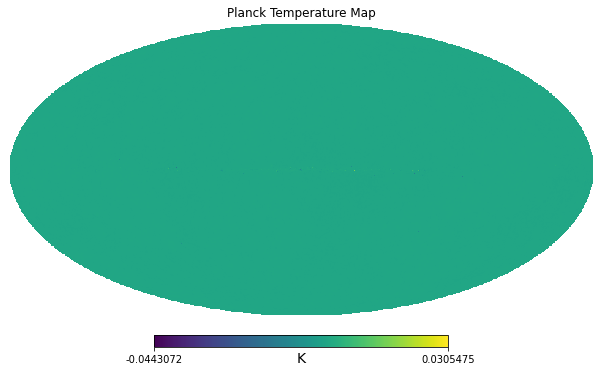

In [ ]:
# Write your code here
hp.mollview(cmb_map,title='Planck Temperature Map',fig=1,unit='K')

### Uh oh!  The core of the galaxy is so bright that it outshines everything else in the map, so the color scale makes the map look the same all over (the CMB fluctuations are very small).

#### Explore values to use for the `min` and `max` options of `mollview` to make the fluctuations in the map visible clearly.

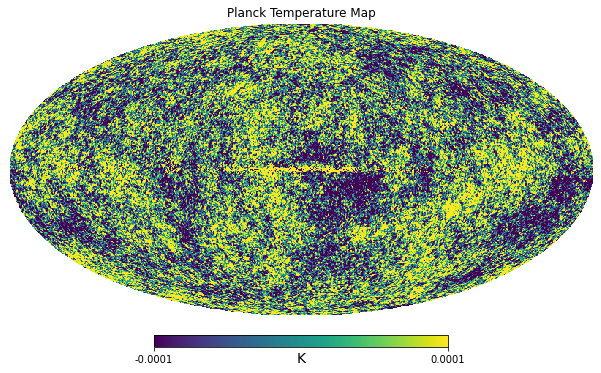

In [ ]:
hp.mollview(cmb_map,min=-0.0001,max=0.0001,title='Planck Temperature Map',fig=1,unit='K')


####Find the coordinates of the brightest point in the map, first by finding its pixel index and then by converting to sky coordinates.

####HINT: `np.argmax` finds the index of the maximum value of an array.  `healpy.pix2ang` can convert to coordinates.  

In [ ]:
import numpy as np
max_pix = np.argmax(cmb_map)
print(max_pix, cmb_map[max_pix])
print('coordinates are', hp.pix2ang(nside,max_pix,lonlat=True), 'deg longitude and latitude')

2095269 0.12758588790893555
coordinates are (209.00390625, -19.392110554904093) deg longitude and latitude


###We will now measure the power spectrum of the map, which should roughly trace this famous plot:

https://sci.esa.int/web/planck/-/51555-planck-power-spectrum-of-temperature-fluctuations-in-the-cosmic-microwave-background
    
###There are seveal issues with the map, so we won't get the result straight away.
        
###Options to calculate the angular power spectrum $C_\ell$ of the map are:
- Use `healpy.anafast` to compute the power spectrum (**DO IT THIS WAY HERE**), or
- Calculate the $a_{\ell m}$ coefficients first, where 

$a_{\ell m} = \int \displaystyle\frac{\delta T}{T} (\hat{n})\, Y_{\ell m}^*({\hat n})\, d^2\hat{n}$. 

And then

$C_\ell = \displaystyle\frac{\sum_m |a_{\ell m}|^2}{2\ell+1}$.

This works in principle, but is quite hard to do when you don't have a full-sky (and you almost never do), so it's not the best method, or

- Calculate the angular **correlation function** $C(\theta)$ first (this is equivalent of $\xi(\theta)$ for galaxies), then covert into $C_\ell$:

$C_\ell = \displaystyle\frac{2\ell+1}{4\pi}\int_0^{2\pi} C(\theta)\, P_\ell(\theta)\, d\cos(\theta)$.

In [ ]:
Cl = hp.anafast(cmb_map)

####Now plot it in the form 

$D_\ell = \ell (\ell + 1) C_\ell / (2 \pi)$

Does your plot look about right?

Text(0, 0.5, '$D_\\ell\\, [(\\mu K)^2]$')

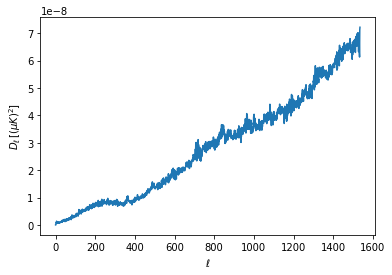

In [ ]:
import matplotlib.pyplot as plt

# array of multipoles going to as many as Cl you have
ell = np.arange(Cl.size)

# prefactor to Cl to get l(l+1)Cl/(2*pi)
f = ell*(ell+1)/(2*np.pi)

# multiply the prefactor and Cl to get the so-called Dl
D=f*Cl
# plot the Dl vs ell
plt.plot(ell,D)
plt.xlabel("$\ell$")
plt.ylabel("$D_\ell\, [(\mu K)^2]$")


###Doesn't look right yet! The bright core of the galaxy is the biggest contaminant.  Use the `gal_cut` argument to `anafast` to remove that region and plot it agan.  Have a look at the map to decide how big an area to remove.

Text(0, 0.5, '$D_\\ell\\, [(\\mu K)^2]$')

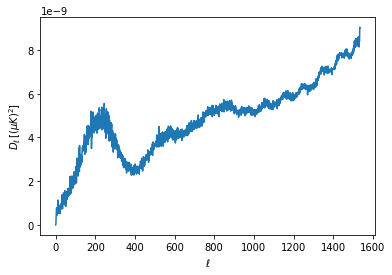

In [ ]:
Cl=hp.anafast(cmb_map,gal_cut=10)
Dl=f*Cl
plt.plot(ell,Dl)
plt.xlabel("$\ell$")
plt.ylabel("$D_\ell\, [(\mu K)^2]$")

###That should be a little better, but there is still a noise level of about 2.1e-14 in the power spectrum `c_ell` .  Plot a version with that subtracted.

####HINT: Note that it's subtracted from $C_\ell$, not $D_\ell$.



Text(0, 0.5, '$D_\\ell\\, [(\\mu K)^2]$')

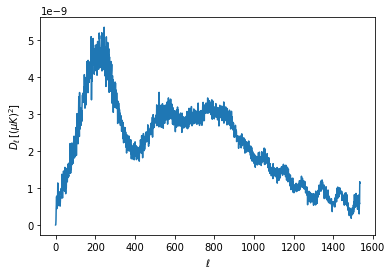

In [ ]:
Cl=Cl-2.1e-14
Dl=f*Cl
plt.plot(ell, Dl)
plt.xlabel("$\ell$")
plt.ylabel("$D_\ell\, [(\mu K)^2]$")



### Finally, at this 'side' parameter the results of a transform are not very accurate above `2*Nside`.  Make a plot going up to just that ell value.

### Also, smooth the curve just for easier viewing (you usually *don't* want to smooth the data for any *analysis*!).

(0.0, 1024.0)

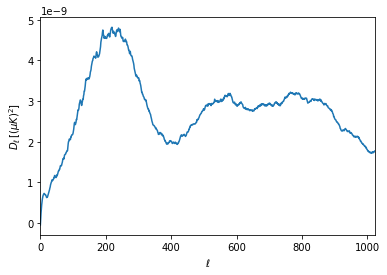

In [ ]:
from scipy.signal import savgol_filter

# pick some window size and poly order, then smooth using Savitzky-Golay
window_size, poly_order = 21, 3
Dl_smooth = savgol_filter(Dl, window_size, poly_order)

plt.plot(ell, Dl_smooth)
plt.xlabel("$\ell$")
plt.ylabel("$D_\ell\, [(\mu K)^2]$")
plt.xlim(0, 2*nside)

###This Looks like the real CMB power spectrum! (well it is real hehehe...). We got the first peak, but not quite the higher peaks --- more care is required to get those right.

## Further optional homework exercises (with healpy commands)

- `remove_monopole` and `remove_dipole' from the map
- Use `ud_grade` to transform the map to one of lower resolution, and plot the change to the $C_\ell$ values.
- Use CAMB to **generate** a CMB power spectrum (take the first TT part), and transform it into a map using healpy (`synfast`)
- ... or, just generate a random map (white noise, $C_\ell$=const)  using `synfast`; this doesn't require CAMB. Does it look like a typical CMB map?
- Calculate the angular power spectrum $C(\theta)$ of the map above. You can do it either directly from the map, or convert the $C_\ell$ to $C(\theta)$ (what's the formula?).

###Takeaway message: Healpix makes CMB work fun and easy!
